# Analysis of tag

Tags are our class labels. As we were trying to predict them, we should deep dive and understand them very well. After removing all the duplicated data we are left with 4.2 Million data points and 42k unique tags.
The number of times a tag appeared is an interesting thing to understand. So I just counted it and put it into a dictionary. If we observe the table below, the “.a” tag appeared in 18 questions, the “.app” tag appeared in 37 questions, and so on. Remember, we will never have a tag repeating two times in the same question.

To save time a subset of the original dataset is used here.

In [31]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
df = pd.read_csv("train_000.csv")
df.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\r\n{\r\n ...,php api file-get-contents


In [15]:
print("Dataframe shape: ",df.shape)

Dataframe shape:  (41234, 4)


### Removing Duplicates

In [18]:
duplicates = df.sort_values('Title', ascending=False).duplicated('Title')
print("Total number of duplicate questions : ", duplicates.sum())
df = df[~duplicates]
print("Dataframe shape after removing duplicate values : ", df.shape)

Total number of duplicate questions :  0
Dataframe shape after removing duplicate values :  (41234, 4)


C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


### Data Analysis on Tags

In [25]:
df["tag_count"] = df["Tags"].apply(lambda x : len(x.split()))
df.head()

,Id,Title,Body,Tags,tag_count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\r\n{\r\n ...,php api file-get-contents,3


In [22]:
df["tag_count"].value_counts()

3    11922
2    10963
4     7870
1     5641
5     4838
Name: tag_count, dtype: int64

In [23]:
print( "Max number of tags in a question: ", df["tag_count"].max())
print( "Min number of tags in a question: ", df["tag_count"].min())
print( "Average number of tags in a question: ", df["tag_count"].mean())

Maximum number of tags in a question:  5
Minimum number of tags in a question:  1
Average number of tags in a question:  2.8860406460687784


Text(0, 0.5, 'Frequency')

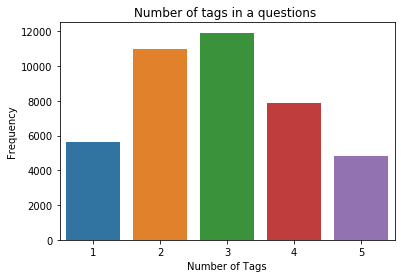

In [48]:
sns.countplot(df["tag_count"])
plt.title("Number of tags in a questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Frequency")

#### Counting frequency of different tags and saving it to a dictionary

In [66]:
vectorizer = CountVectorizer(tokenizer= lambda text : text.split(" "))
tag_dtm = vectorizer.fit_transform(df["Tags"])

In [67]:
tags = vectorizer.get_feature_names()
tags[:15]

['.class-file',
 '.each',
 '.emf',
 '.hgtags',
 '.htaccess',
 '.htpasswd',
 '.mov',
 '.net',
 '.net-1.1',
 '.net-2.0',
 '.net-3.5',
 '.net-4.0',
 '.net-4.5',
 '.net-assembly',
 '.net-cf-3.5']

In [50]:
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags,freqs))

In [51]:
tag_df = pd.DataFrame(result.items(), columns=["Tags", "Counts"])
tag_df.head()

,Tags,Counts
0,.class-file,1
1,.each,6
2,.emf,1
3,.hgtags,1
4,.htaccess,146


In [58]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted["Counts"].values

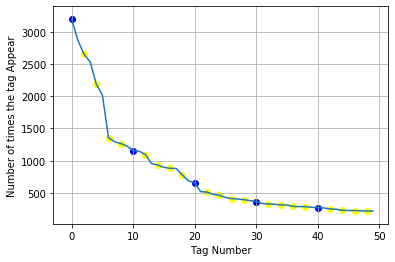

In [53]:
plt.plot(tag_counts[:50])
plt.scatter(x= list(range(0,50,2)), y = tag_counts[0:50:2], c= 'yellow')
plt.scatter(x= list(range(0,50,10)), y = tag_counts[0:50:10], c = "blue")
plt.grid()
plt.xlabel("Tag Number")
plt.ylabel("Number of times the tag Appear")
plt.show()

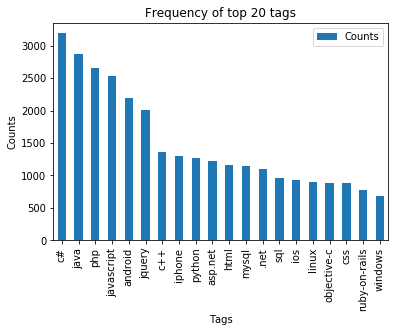

In [54]:
itr=np.arange(20)
tag_df_sorted.head(20).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(itr, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

#### From the above bar plot we can see that C# ,java,php are the most searched tags on stackoverflow.